In [1]:
"""referring to https://blog.csdn.net/ay1156983836/article/details/102718848
"""
import networkx as nx
import matplotlib.pyplot as plt
nG=nx.Graph();#创建一个空的图
nG


In [3]:
import pandas as pd   
#分解信息
def list_split(content,separator): 
    new_list=[]
    for i in range(len(content)):
        new_list.append(list(filter(None,content[i].split(separator))))#以separator为分隔符
    return new_list
#清除信息中的空格
def list_replace(content,old,new):            
    return[content[i].replace(old,new) for i in range(len(content))]

WXdata=pd.read_excel('PyDm_data.xlsx','WXdata');

In [4]:
def find_words(content,pattern): #寻找关键词
    return[content[i] for i in range(len(content)) if (pattern in content[i])==True]
    
def search_university(content,pattern):#寻找大学
    return len([find_words(content[i],pattern) for i in range(len(content))
               if find_words(content[i],pattern)!=[]])
university=pd.read_excel('PyDm_data.xlsx','university');
#university1=sum(university,[])

organ=list_split(WXdata['Organ'],';')

data1=pd.DataFrame([[i,search_university(organ,i)] for i in university['学校名称']])

keyword=list_split(WXdata['Keyword'].dropna(axis=0,how='all').tolist(),';;')
keyword1=sum(keyword,[])
author=list_replace(WXdata['Author'].dropna(axis=0,how='all').tolist(),',',';')
author1=list_split(author,';')
author2=sum(author1,[])
data1;

In [5]:
#获取前30名的高频数据
data_author=pd.DataFrame(author2)[0].value_counts()[:30].index.tolist()

data_keyword=pd.DataFrame(keyword1)[0].value_counts()[:30].index.tolist()

data_university=data1.sort_values(by = 1,ascending=False,axis=0)[0:30][0].tolist()
#data_university=data1.sort_values(by=1，ascending=False,axis=0)[0:30]['学校名称'].tolist()
data_university;

In [6]:
def occurence(data,document): #定义共现矩阵
    empty1=[];empty2=[];empty3=[]
    for a in data:
        for b in data:
            count = 0
            for x in document:
                if [a in i for i in x].count(True)>0 and [b in i for i in x].count(True)>0:
                    count=count+1
            empty1.append(a);empty2.append(b);empty3.append(count)#append() 方法向列表的尾部添加一个新的元素。只接受一个参数
    df=pd.DataFrame({'from':empty1,'to':empty2,'weight':empty3})
    #具有标注轴（行和列）的二维大小可变的表格数据结构
    G=nx.from_pandas_edgelist(df,'from','to','weight')
    #返回包含边列表的图形
    return (nx.to_pandas_adjacency(G,dtype=int))#注意对齐

In [7]:
Matrix1=occurence(data_author,author1)
Matrix1;
Matrix2=occurence(data_university,organ)
Matrix2;
Matrix3=occurence(data_keyword,keyword)
Matrix3;

e:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


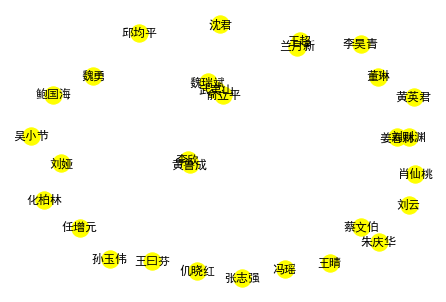

In [8]:
import networkx as nx
import matplotlib.pyplot as plt              #加入中文汉字
plt.rcParams['font.sans-serif']=['SimHei']   #设置字体为SimHei显示中文
plt.rcParams['axes.unicode_minus']=False     #设置正常显示字符
#设置线条样式  plt.rcParams['lines.linestyle'] = '-.'
#设置线条宽度 plt.rcParams['lines.linewidth'] = 3

nf1=nx.from_pandas_adjacency(Matrix1)
#建立布局，对图进行布局美化，networkx 提供的布局方式有：
#- circular_layout：节点在一个圆环上均匀分布;   - random_layout：节点随机分布
#- shell_layout：节点在同心圆上分布;     - spring_layout： 用Fruchterman-Reingold算法排列节点（类似多中心放射状）
#- spectral_layout：根据图的拉普拉斯特征向量排列节

#以下语句绘制以带宽为线的宽度的图

nx.draw(nf1,with_labels=True,node_color='yellow')

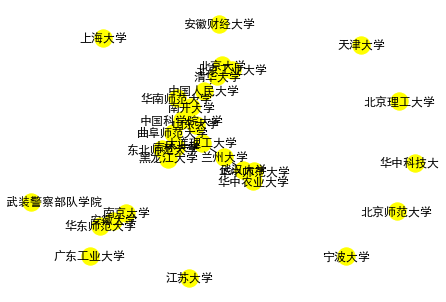

In [9]:
nf2=nx.from_pandas_adjacency(Matrix2)
nx.draw(nf2,with_labels=True,node_color='yellow')

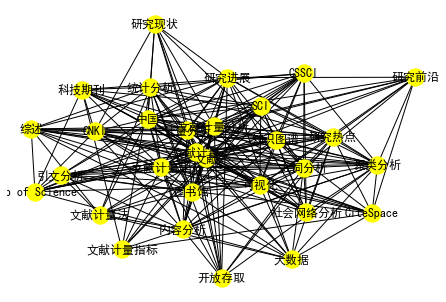

In [10]:
graph3=nx.from_pandas_adjacency(Matrix3)
nx.draw(graph3,with_labels=True,node_color='yellow')